In [1]:
import pandas as pd 

In [3]:
# 저장한 객체 load
unpickled = pd.read_pickle("morphs_data2_weakpoint.pickle")

In [4]:
clean_data = unpickled
clean_data.head(3)

,회사이름,회사코드,리뷰코드,직종구분,재직상태,근무지역,등록일자,별점평가,승진기회,복지급여,워라밸,사내문화,경영진,기업장점,기업단점,바라는점,성장예상,추천여부,RECOM_TF
0,삼성전자(주),30139,1084668,경영/기획/컨설팅,전직원,해외,2019-04-18,80,80,80,60,60,80,연봉과 복리후생이 매우 좋으며 열심히 하면(운도 필요하지만) 기회가 주어지는 곳. ...,조직 이 방대 하 여 의사 결정 이 느리 고 소통 이 잘 되 지 않 음 . 보신주의...,단기 성과주의를 경계해야 함. 최고경영진은 장기비전과 미래를 고민하나 적지 않은 수...,비슷,이 기업을 추천 합니다!,1.0
1,삼성전자(주),30139,1084223,생산관리/품질관리,전직원,경기,2019-04-18,80,60,100,80,80,80,글로벌 1위기업답게 체계적인 시스템으로 돌아가는 조직문화와 업무진행,굉장히 전문 적 이 라서 본인 의 업무 외 엔 전혀 모름 다양 하 게 배우 기 는 어려움,다양한 조직문화 활동으로 많이 좋아지고 있지만아직도 갑질 문화가 남아있다. 근절이 필요!,성장,이 기업을 추천 합니다!,1.0
2,삼성전자(주),30139,1083148,인사/총무,전직원,경기,2019-04-17,80,20,100,100,80,80,"아침 점심 저녁 다 제공, 셔틀버스도 운영되고 근무환경 좋음급여가 하는일에 비해 많음",사업 부 내 에 자주 조직 이 변경 되 어 맡 는 팀 들 이 자주 바뀜,파견직에서 업무평가로 계약직 정규직 전환 기회부여되었음 좋겠자,성장,이 기업을 추천 합니다!,1.0


### TF-IDF Vector

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# stopwords 불용어 빼고 정리
tfidfvector = TfidfVectorizer(max_features=350)
# TF-IDF를 통해 산출한 단어의 중요도에 따라 최대 180개의 단어를 추출하도록 제약을 가함

In [47]:
tfidfmatrix = tfidfvector.fit_transform(clean_data['기업단점'])
print(tfidfmatrix.shape)

(404099, 350)


In [48]:
# vocab = tfidfvector.get_feature_names()
# print(vocab)

In [49]:
data_array = tfidfmatrix.toarray()

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(data_array.T)
# 400개 features로 이뤄진 vector들을 2차원에 표현하고자 함

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 350 samples in 8.432s...
[t-SNE] Computed neighbors for 350 samples in 142.269s...
[t-SNE] Computed conditional probabilities for sample 350 / 350
[t-SNE] Mean sigma: 5.181930
[t-SNE] KL divergence after 250 iterations with early exaggeration: 133.747009
[t-SNE] KL divergence after 2150 iterations: 1.691823


In [52]:
print(Z[0:5])
print('Top words: ',len(Z))

[[ 8.75659    -1.5156984 ]
 [ 1.6086199   5.153262  ]
 [-3.85738     3.8688908 ]
 [-1.0705558   2.9647427 ]
 [-0.23621954  6.1363177 ]]
Top words:  350


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

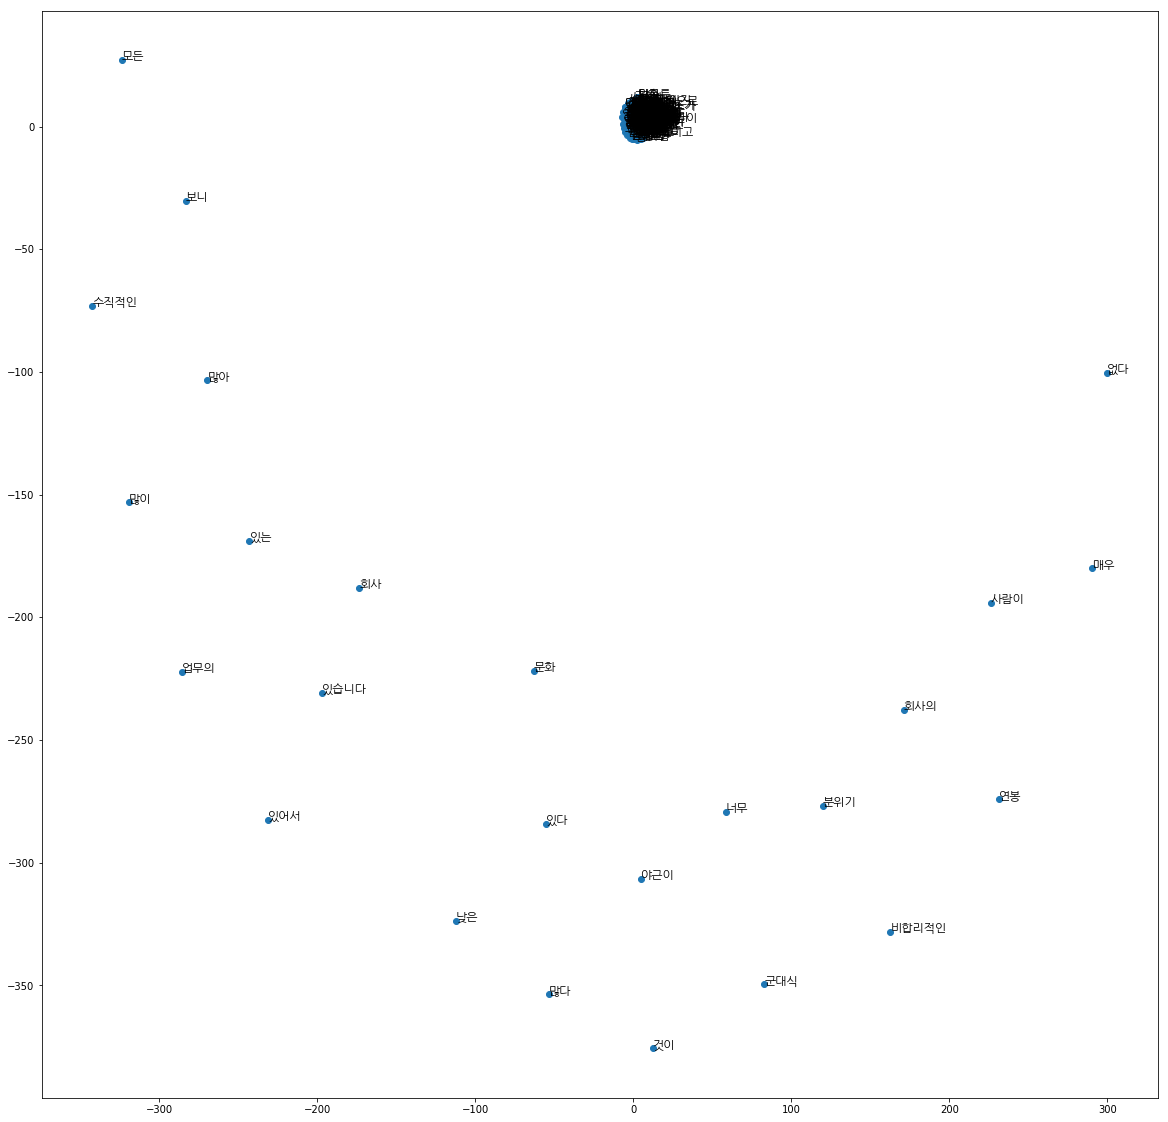

In [54]:
import matplotlib.font_manager as fm
font_path="c:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)


vocab = tfidfvector.get_feature_names()
# print(vocab)

# import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(vocab)):
    plt.annotate(s=vocab[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]), fontProperties=fontprop)


plt.draw()

특정 단어가 뭉쳐져 있고, 나머지 단어가 떨어져 있어서 제대로 시각화가 되지 않음
(전체 회사를 다 합쳐서 시각화를 해서, 오히려 회사별 평점을 토대로 시각화하는 것보다 표현이 잘 되지 않음)

max_features=180개 단어로 시각화

In [87]:
tfidfvector = TfidfVectorizer(max_features=170)

In [88]:
tfidfmatrix = tfidfvector.fit_transform(clean_data['기업단점'])
print(tfidfmatrix.shape)

(404099, 170)


In [89]:
data_array = tfidfmatrix.toarray()

In [90]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(data_array.T)
# 400개 features로 이뤄진 vector들을 2차원에 표현하고자 함

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 170 samples in 0.120s...
[t-SNE] Computed neighbors for 170 samples in 0.602s...
[t-SNE] Computed conditional probabilities for sample 170 / 170
[t-SNE] Mean sigma: 9.764827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 135.747955
[t-SNE] KL divergence after 2700 iterations: 1.225190


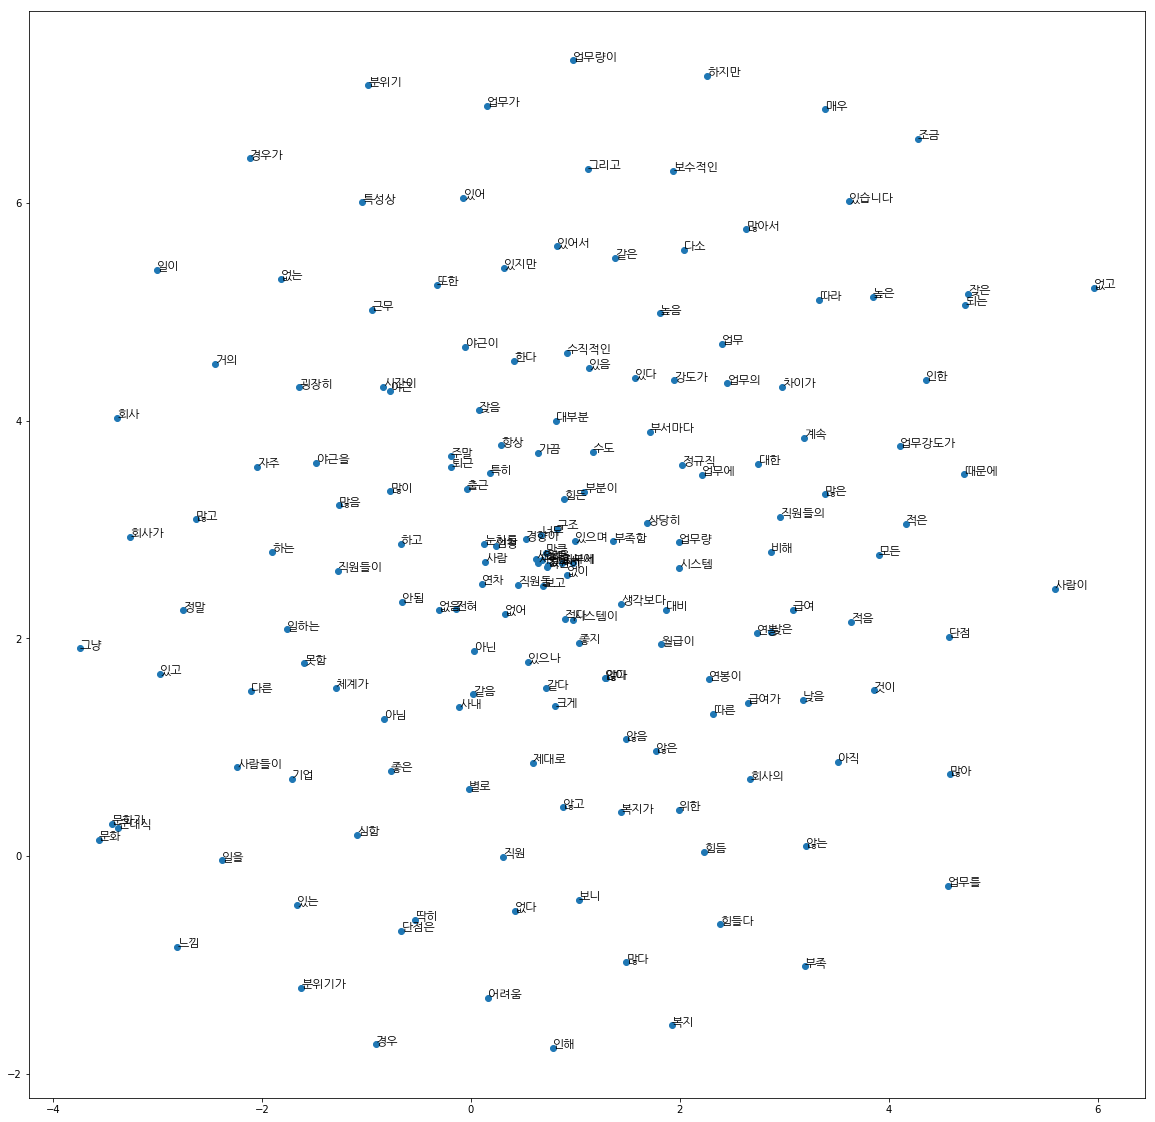

In [91]:
import matplotlib.font_manager as fm
font_path="c:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)


vocab = tfidfvector.get_feature_names()
# print(vocab)

# import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(vocab)):
    plt.annotate(s=vocab[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]), fontProperties=fontprop)


plt.draw()

텍스트 시각화의 경우, 회사별로 표현(예: 신한카드/신한은행)할 때보다 오히려 단어 간의 특징이 약화되는 것으로 보임
(별다른 특징이 보이지 않음)